In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [85]:
data = pd.read_csv("/20014891_NguyenThanhAn/Machine_Learning/Datasets/iris.data")
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [86]:
data.columns = ['x1', 'x2', 'x3', 'x4', 'y']
data = data.iloc[50:150]
data['y'] = data['y'].apply(lambda x: 0 if x == 'Iris-versicolor' else 1)
data.tail()

<ipython-input-86-cdd52c375d1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y'] = data['y'].apply(lambda x: 0 if x == 'Iris-versicolor' else 1)


,x1,x2,x3,x4,y
144,6.7,3.0,5.2,2.3,1
145,6.3,2.5,5.0,1.9,1
146,6.5,3.0,5.2,2.0,1
147,6.2,3.4,5.4,2.3,1
148,5.9,3.0,5.1,1.8,1


In [87]:
X = data[['x2','x3']].values.astype(np.float32)
y = data['y'].values.astype(np.int32)

np.random.seed(123)
shuffle_idx = np.random.permutation(y.size)

X, y = X[shuffle_idx], y[shuffle_idx]
percent70 = int(len(shuffle_idx)*0.7)

X_train, X_test = X[:percent70], X[percent70:]
y_train, y_test = y[:percent70], y[percent70:]


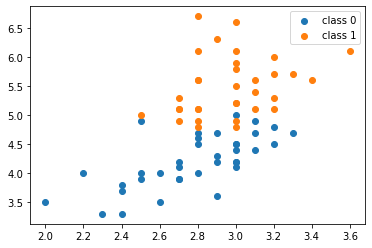

In [88]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train==0, 1], label = "class 0")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train==1, 1], label = "class 1")
plt.legend()
plt.show()

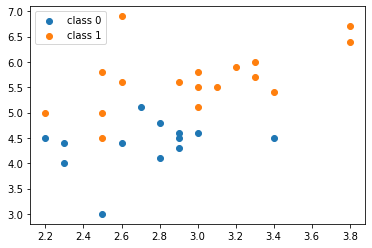

In [105]:
plt.scatter(X_test[y_test == 0, 0], X_test[y_test==0, 1], label = "class 0")
plt.scatter(X_test[y_test == 1, 0], X_test[y_test==1, 1], label = "class 1")
plt.legend()
plt.show()


#### net


In [115]:
class Perceptron():
    def __init__(self, lr=0.01, n_iter=50):
        self.lr = lr
        self.n_iter = n_iter
        
    def output(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def predict(self, X):
        return np.where(self.output(X)>=0.0, 1, 0)
        
    def fit(self, X, y):
        self.w_ = np.random.normal(size = X.shape[1]+1)
        self.errors = []
        for _ in range(self.n_iter):
            error = 0
            for xi, target in zip(X, y):
                y_pre = self.predict(xi)
                update = self.lr * (target - y_pre)
                self.w_[1:] += update * xi
                self.w_[0] += update
                error += int(update!=0.0)
            self.errors.append(error)
        return self

In [116]:
per = Perceptron(lr = 0.01,n_iter = 50)
kq = per.fit(X_train,y_train)
print(kq.w_)

[-1.01501076 -0.30988539  0.39643241]


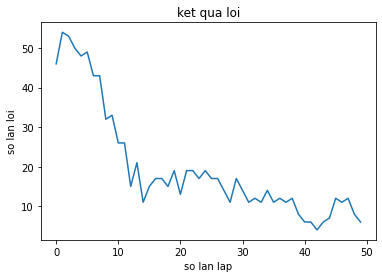

In [128]:
plt.plot(kq.errors)
plt.title("ket qua loi")
plt.xlabel("so lan lap")
plt.ylabel("so lan loi")
plt.show()

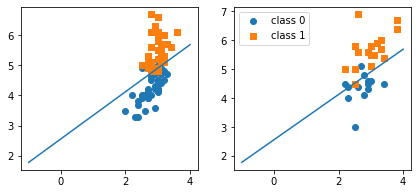

In [131]:
x_min = -1
y_min = (-(kq.w_[1] * x_min) - kq.w_[0]) / kq.w_[2]

x_max = 4
y_max = (-(kq.w_[1] * x_max) - kq.w_[0]) / kq.w_[2]


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()